In [1]:
import geopandas as gpd
from tree_detection_framework.evaluation.evaluate import match_points, assess_matches

In [2]:
DETECTED_TREES_PATH = "/ofo-share/species-prediction-project/intermediate/detected_trees/0002_000451_000446/tree_tops.gpkg"
FIELD_TREES_PATH = "/ofo-share/species-prediction-project/intermediate/shifted_field_trees/0002_000451_000446.gpkg"

In [3]:
gdf_detected_trees = gpd.read_file(DETECTED_TREES_PATH)
gdf_field_trees = gpd.read_file(FIELD_TREES_PATH)

Case 1:
- Match points using only distance constraint
- Greedy approach with distances
- This approach needs a constant `distance_threshold` value to be defined.

2025-08-11 22:06:44,434 - INFO - Not using height values for matching points.


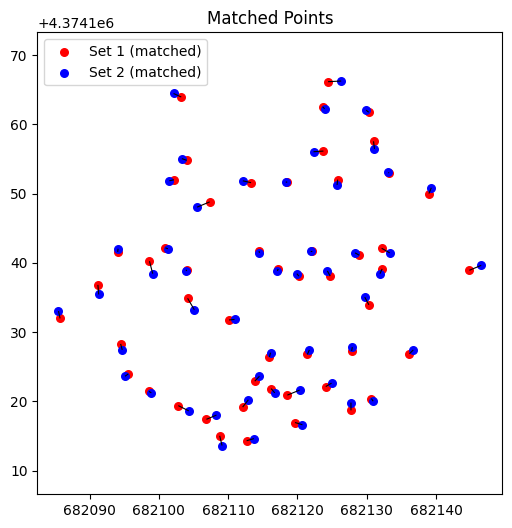

Total number of matches:  51
P, R, F1:  0.03884234577303884 0.4722222222222222 0.07178043631245602


In [4]:
matches = match_points(
    gdf_field_trees, gdf_detected_trees, vis=True, distance_threshold=2
)
print("Total number of matches: ",len(matches))
precision, recall, f1_score = assess_matches(matches, n_ground_truth=len(gdf_field_trees), n_predictions=len(gdf_detected_trees))
print("P, R, F1: ",precision, recall, f1_score)

Case 2:
- Match points using distance and height constraint
- Greedy approach with distances
- This approach needs height values which can be provided as column names or by path to chm file and specifying `fillin_method`

Note: Here, `use_height_in_distance = 0`

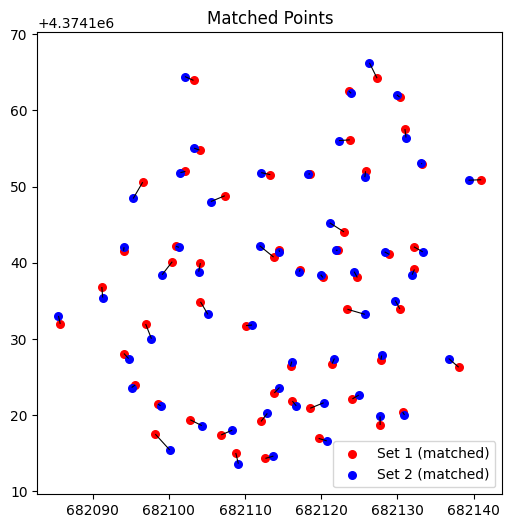

Total number of matches:  56
P, R, F1:  0.04265041888804265 0.5185185185185185 0.07881773399014778


In [5]:
matches = match_points(
    gdf_field_trees, gdf_detected_trees, height_column_1="height", height_column_2="height", vis=True
)
print("Total number of matches: ",len(matches))
precision, recall, f1_score = assess_matches(matches, n_ground_truth=len(gdf_field_trees), n_predictions=len(gdf_detected_trees))
print("P, R, F1: ",precision, recall, f1_score)

Case 3:
- Match points using distance and height constraint
- Scale the heights by a factor spcified in `use_height_in_distance` and use it as an additional dimension during distance computation

2025-08-11 22:06:44,810 - INFO - Using height as an additional scaled dimension to compute distance


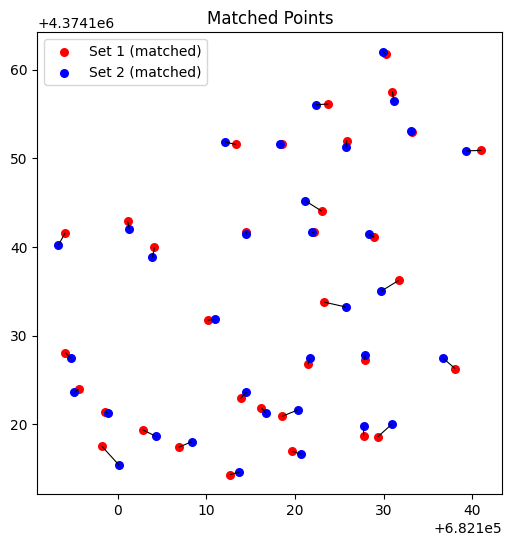

Total number of matches:  34
P, R, F1:  0.025894897182025894 0.3148148148148148 0.047853624208304


In [6]:
matches = match_points(
    gdf_field_trees, gdf_detected_trees, height_column_1="height", height_column_2="height", vis=True, use_height_in_distance=2
)
print("Total number of matches: ",len(matches))
precision, recall, f1_score = assess_matches(matches, n_ground_truth=len(gdf_field_trees), n_predictions=len(gdf_detected_trees))
print("P, R, F1: ",precision, recall, f1_score)